# Data 200: Database Systems and Data Management for Data Analytics


# Name:

# Take Home Final Exam
<font color='red'>**Due Date:** May 16, 12pm (noon) </font>
---

Task: Scrape data from a job search website


Website: Indeed.com

Objective: Collect job postings that match certain keywords and location filters, and then perform data analysis to extract insights about the job market.

Instructions:

1. Choose a location and a set of keywords that are relevant to your field of study. For example, you can schoose a field such as data science, computer science, or any other field you are interested in. In terms of the location, you might choose to search for "data analytics" jobs in "San Francisco". You are free to choose the field and location on this assignment.
2. Scrape job postings from Indeed.com using selenium and python. Your code should extract the following information for each job posting:
- Job title
- Company name
- Job description
- Job location
- Date posted
3. Clean and preprocess the data as necessary. You may want to remove duplicates and perform other data cleaning tasks to prepare the data for analysis.
4. Use data analysis techniques to extract insights about the job market. For example, you might:
- Identify which companies are hiring the most for the given job titles and locations.
- Determine the distribution of job titles and their average salaries.
- Analyze the frequency of certain keywords in job descriptions, and determine which skills and qualifications are most in demand.
5. Write a report summarizing your findings. Your report should include tables and visualizations to support your conclusions, and should provide actionable insights that could be used by job seekers, employers, or policymakers.
Submit your code and report as a single .ipynb file (you can do it in this current notebook as a combination of code cells and markdown cells), along with any necessary instructions for running your code. Make sure your code is well-documented and organized, and that your report is well-written and easy to follow. <br> <br>
Note: You do not need to perform text analysis or create word clouds for this exam. However, if you are interested in learning more about these techniques, you may want to explore them on your own as a side project.
<br><br>
Here is the rubric that I will use to grade your final exam:

| Item                        | Weight |
|-----------------------------|--------|
| Code accuracy               | 25%    |
| Code clarity and annotation | 25%    |
| Exploratory data analysis   | 25%    |
| Discussion of findings      | 25%    |

<br>
Good luck!


In [1]:
import pandas as pd
import time
import random
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loads the webdriver and opens a new window
driver=webdriver.Chrome('/Users/caleb/Downloads/chromedriver_mac_arm64/chromedriver')

/var/folders/hr/hqrzrm2j34l7d_9f6pb27ypw0000gn/T/ipykernel_25309/2938907802.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('/Users/caleb/Downloads/chromedriver_mac_arm64/chromedriver')


In [3]:
#Scraps the data of the job descriptions, then clicks the next jobcard to do so for the next description
def getRightPageDetails():
    links=[]
    descriptions=[]
    
    # finds the xpath's to the links which expand the card to view the full description
    linkToRightPanel=driver.find_elements('xpath','//*[contains(@aria-label,"full")]')
    
    # adds each the links to a list
    for i in linkToRightPanel:
        links.append(i.get_attribute('id'))
    
    # iterates through the list to find the links for the descriptions then clicks the link to open the next description
    for i in links:
        button = driver.find_element('xpath','//*[@id="'+i+'"]')
        button.click()
        time.sleep(random.uniform(2,3))
        
        # adds the full job description to a list
        descriptions.append(getFullText())
        
    return descriptions



In [4]:
#scraps the descriptions of the currently open job listing
def getFullText():
    # Due to slow loading times, the function does not run until the page loads and the job descriptions is found
    WebDriverWait(driver, 20).until(presence_of_element_located((By.ID, "jobDescriptionText")))
    
    # scrpas the job description
    fullJobDescription = driver.find_element('xpath', '//*[@id="jobDescriptionText"]')
    return fullJobDescription.text

In [5]:
#scraps the data of all the items which can be found in the job cards on the left side of the page
def getLeftPageDetails():
    jobDetails=[]
    
    for i in range(1,19):
        # Due to the websites layout job cards with the values 6,12, and 18 are blank
        if i not in (6,12,18):
            
            # Scraps the data of the job title
            jobTitleElement=driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+str(i)+']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[1]/h2')
            jobTitle=jobTitleElement.text
            
            # Scraps the data of the company name
            companyNameElement=driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+str(i)+']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/span[1]')
            companyName=companyNameElement.text
            
            # Scraps the data of the jobs location
            locationElement=driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+str(i)+']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/div')
            location=locationElement.text
            
            # Scraps the data of the date posted
            postedElement=driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+str(i)+']/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div/span')
            posted=postedElement.text

            # Adds all the details to a list of lists
            jobDetails.append([jobTitle,companyName,location,posted])
    return jobDetails


In [6]:
def getAllData():
    
    #loads the start page of the data
    driver.get('https://www.indeed.com/jobs?q=computer+science&l=New+York%2C+NY&radius=100&start=790&pp=gQShAAABh_3LvhkAAAACApK44gJqAQcBh5ACFTQgQg1ECtIBB-4BBgrchZ5mE9F36zPAFFiSnHunGxZgu-dZyF6zciqWHUZ_ObbZa03LDY5-J98VUuq-VKarE6BeXS4Pid2h84GmEILqsV0LO59FDCyOiboR12lItimq4s3jP13smhq2bcOxGsmyPxORJ_dCHPAlzQiQ4rDoq-GdW1Fl2S5CYO2UbTIg4fb2IM1E7BQZ03JxTPdEaneYCAW8mVmVPErAQP33JKvIga2lZbucz78cYrbwmqE_9E8fl201z_Q0kD1hRgZTd2Pphu8Gnzs1ruOBWGCOJmbb-91mDa29hc2I0KOgNyIpdBxQt4UrzmhrBBghyaT7A845zm5QiPl7u7c7J__Gkkg7I1uosXqY_Qptvk5EzUHb-wrSNGSEIlVtXMln9cyHDsh8KoBCJzLNnRms9W7V8r1GLz8k80GGvz7j32k_x0smUSNv5iC1pb3n66cr13HqiEbDu-j-mbxXBlcX0xsVaERpMbx5wFWOl29GLRy3_ZB8SFfVnEO0YxdX_Is2C_SAK2KekEjy6L42OV9VifYb9_xGbMG2msh9C4gUQj_www6JoVKQpNeKF45NaNEh5eljhhY90ziKcAFlUiCDNg35AbBADrjt2PS6qTm5VG1HGQrG8NjnRz-exYB7_-VVWfPVZWN5QdLZEiM_urHaBlXb_q8tBj_32TRasww3QXc0ESLwCSBgDgHuw4jFr1KoC6LSqpFa8ESE-M_6QpDoc3rEOGq5nDwoyLlj6Df93H3zVUNSCH_mi_KV2hNfAf5vB643Kxp3o_eOtgRWTqoROlWakqFOU5tWva2-AAA&vjk=96d6f66d3e0297d4')
    
    #creates an empty data frame which will be filled with the page contents
    totalDetails = pd.DataFrame()
    
    for i in range(100):
        
        # The try except block runs the method and throws an error message if it fails
        try:
            
            # The driver waits till the job description is fully loaded to ensure the program doesnt crash
            WebDriverWait(driver, 20).until(presence_of_element_located((By.ID, "jobDescriptionText")))
            
            # scraping data from the left side of a single page
            pageDetailsL = getLeftPageDetails()

            # scraping data from the right side of a single page
            pageDetailsR = getRightPageDetails()

            # df with the current page data, left side
            singleLeftDetails = pd.DataFrame(pageDetailsL,columns=['Job Title','Company','Location','Date Posted'])

            # df with the current page data, right side
            singleRightDetails = pd.DataFrame(pageDetailsR,columns=['Comment'])
            
            # Joins the data of the left side details and right side details
            singleDetails=singleLeftDetails.join(singleRightDetails,how='outer')

            # Adds each page the entire data
            totalDetails = pd.concat([totalDetails,singleDetails])

            # clicks on a the next page
            # The try except block is present to prevent the program from clicking next page on the final page
            # to ensure that the program doesn't crash
            try:            
                button = driver.find_element('xpath','//*[contains(@aria-label,"Next Page")]')
                button.click()
            except:
                pass

        except:
            print('Error!')
        
        # Due to the slow run time of the program the data is converted to a csv file and downloaded to avoid having to
        # rerun the entire program.
        totalDetails.to_csv('details0-100.csv')
        return totalDetails

In [7]:
# Cleans the text of a given string
def cleanText(text):
    # ensures that the given object is a string to avoid throwing an error
    if type(text)==str:
            
        # Remove leading/trailing whitespace
        text = text.strip()

        # Remove new lines character (\n)
        text = text.replace('\n',' ')

        # Remove extra whitespaces
        text = ' '.join(text.split())

        return text

In [8]:
#Preprocessing and cleaning the data

# Reads the data from the downloaded csv file with all the information
df = pd.read_csv('/Users/caleb/Desktop/GitDownloads/final-exam-calebloring/exams/final/details0-100.csv')

# Removes the duplicate listings from the dataframe
df=df.drop_duplicates(subset='Comment')

# Cleaning the text of each column (which needs cleaning)
df['Location']=df['Location'].apply(cleanText)
df['Date Posted']=df['Date Posted'].apply(cleanText)
df['Comment']=df['Comment'].apply(cleanText)

# Remove listings with missing information
df.dropna(inplace=True)

# Resets the index following the preprocessing
df=df.reset_index(drop=True)

In [9]:
# Creates data frame where each job is remote work
df_remote = df[df['Location'].str.contains('remote',case=False)]

In [10]:
# Creates data frame where each job requires a bachelors degree
df_education_bs = df[df['Comment'].str.contains('bachelor|bachelors',regex=True,case=False)].reset_index(drop=True)

In [11]:
# Creates data frame where each job requires a masters degree
df_education_ms = df[df['Comment'].str.contains('masters',regex=True,case=False)].reset_index(drop=True)

In [12]:
# Creates data frame where each job had been posted at least 30+ days before the data was scrapped
df_posted = df[df['Date Posted'].str.contains('30+',case=False)]

In [13]:
# Creates data frame where each job had been posted the day before or the day of when the data was scrapped
df_posted_recent = df[df['Date Posted'].str.contains('(Posted 1 day|just posted)',regex=True,case=False)]

/var/folders/hr/hqrzrm2j34l7d_9f6pb27ypw0000gn/T/ipykernel_25309/3751905890.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_posted_recent = df[df['Date Posted'].str.contains('(Posted 1 day|just posted)',regex=True,case=False)]


In [14]:
# Creates data frame where every lisitng requuires SQL or pandas experience
df_skills = df[df['Comment'].str.contains('SQL|pandas',regex=True,case=False)].reset_index(drop=True)

In [15]:
# Creates variables which satisfy each condition and are also remote
df_postedrecent_remote = pd.merge(df_posted_recent,df_remote).drop_duplicates(subset='Comment')
df_olderlisting_remote = pd.merge(df_posted,df_remote).drop_duplicates(subset='Comment')

df_education_bs_remote = pd.merge(df_education_bs,df_remote).drop_duplicates(subset='Comment')
df_education_ms_remote = pd.merge(df_education_ms,df_remote).drop_duplicates(subset='Comment')

df_skills_remote = pd.merge(df_skills,df_remote).drop_duplicates(subset='Comment')

In [16]:
# Creates variable containing the percent of variables that are also remote

df_postedrecent_remote_percent = round((len(df_postedrecent_remote)/len(df_posted_recent))*100,2)
df_olderlisting_remote_percent = round((len(df_olderlisting_remote)/len(df_posted))*100,2)
df_education_bs_remote_percent = round((len(df_education_bs_remote)/len(df_education_bs))*100,2)
df_education_ms_remote_percent = round((len(df_education_ms_remote)/len(df_education_ms))*100,2)
df_skills_remote_percent = round((len(df_skills_remote)/len(df_skills))*100,2)


In [17]:
#columns for final dataframe

num_in_table=[len(df_remote),len(df_posted_recent),len(df_posted),len(df_education_bs),
              len(df_education_ms),len(df_skills)]

num_remote=[len(df_remote),len(df_postedrecent_remote),len(df_olderlisting_remote),len(df_education_bs_remote),
            len(df_education_ms_remote),len(df_skills_remote)]

num_remote_percent=[100,df_postedrecent_remote_percent,df_olderlisting_remote_percent,
                    df_education_bs_remote_percent,df_education_ms_remote_percent,df_skills_remote_percent]

In [18]:
#index for final dataframe 
row_names=['Remote','Day old or Posted Today','Posted 30+ Days Ago','Bachelors required',
           'Masters Required','SQL/pandas required']

In [19]:
# Create new dataframe to display values
final_df=pd.DataFrame(index=row_names)
final_df['Number of Jobs']=num_in_table
final_df['Number of jobs which are remote']=num_remote
final_df['Percent of jobs which are remote']=num_remote_percent

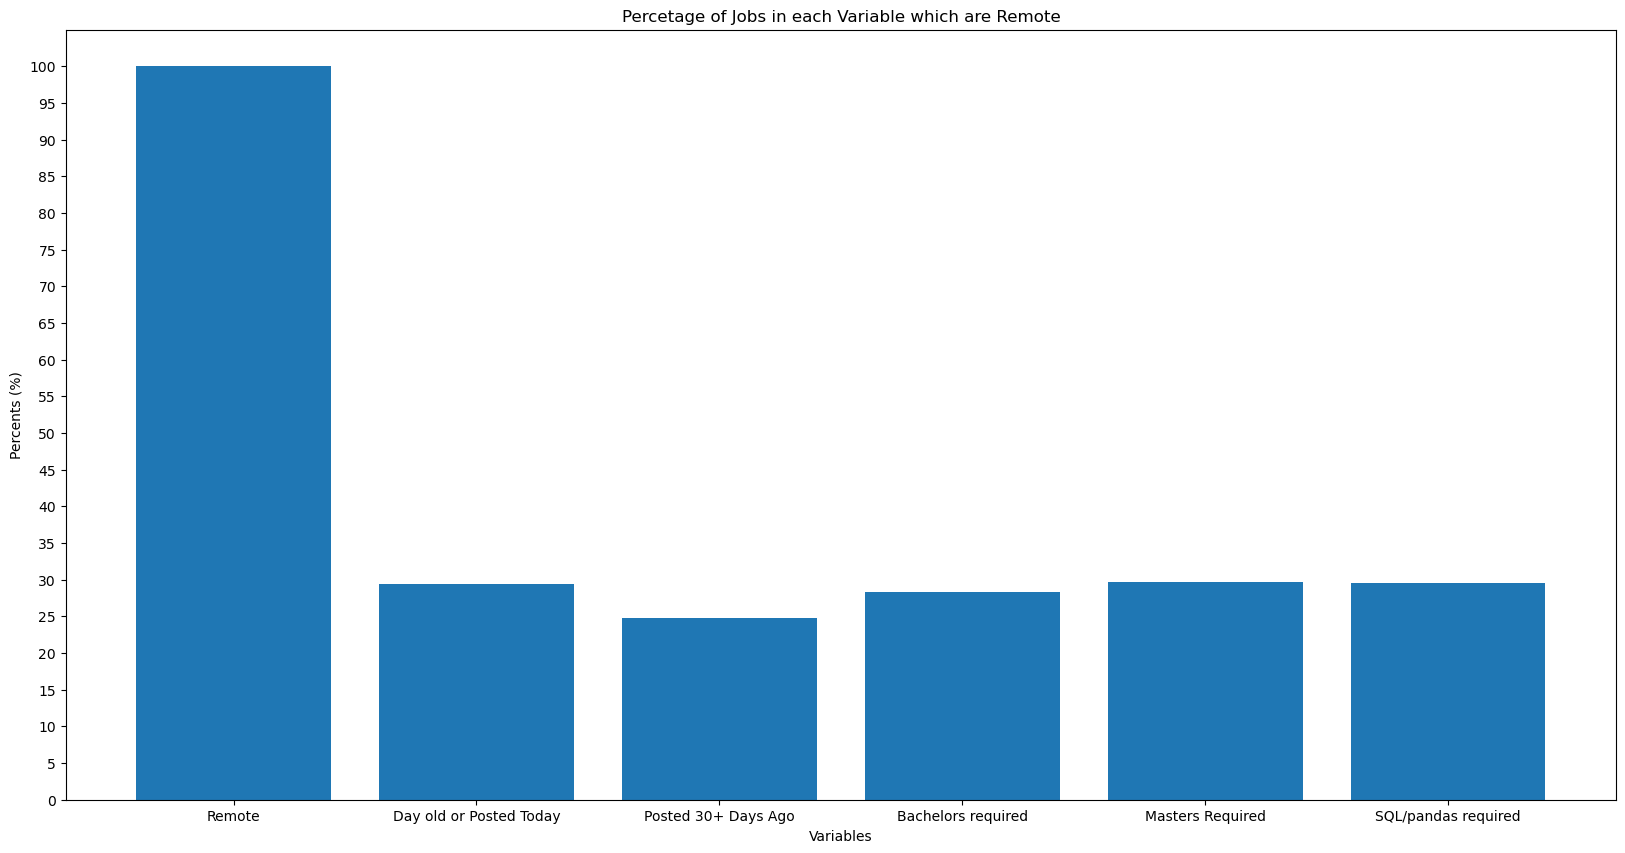

In [20]:
# Create row names and percent values
bars = row_names
percents = num_remote_percent

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20,10))

# Plot the bar graph
ax.bar(bars, percents)

# Set plot title and labels
ax.set_title('Percetage of Jobs in each Variable which are Remote')
ax.set_xlabel('Variables')
ax.set_ylabel('Percents (%)')
ax.set_yticks(np.arange(0,105,5))

# Show the plot
plt.show()

# Report

Using data from 1500 computer science jobs based in New York, NY posted to indeed.com, insights have been made about the job market. The following data was collected from each job listing: the job title, company name, location, date posted, and the full job description. This data provided thorough information to conduct a data analysis of the job market.

Following the COVID-19 pandemic many tech-based jobs, especially those in cities with high rents such as New York, have been hiring and increasing number of remote workers. The data analysis performed attempted to determine which elements of the job postings influenced whether a job was remote.   

The data was cleaned immediately after being scraped. This clean up included removing excess white spaces, new line characters, and job listings with missing data. Duplicate job listings were then removed. The data was compiled into a pandas data frame ready to be analyzed. The first variable examined was to see when jobs were posted. Two data frames were created, job listings which had been posted on the day the data was scraped or the day before, and a second table which included all the listings which were posted more than 30 days ago. This was to see how those posted more recently compared to jobs which were struggling to be filled. The next variable was education, two more data frames were constructed. One in which a bachelor’s degree was required in the full description and the other where a master’s degree was required. This was to determine whether more advanced jobs were more likely to be remote. The final variable checked created a data frame based on the skills required, namely which descriptions asked for experience with SQL or pandas. This was to determine if jobs which require certain skills are more likely to be remote.
	
The data frames where then all merged with a data frame which contained all the jobs which are remote. These tables provided information on how many of the jobs with each condition are also remote work. The number of jobs which satisfied each variable, the number of these which were also remote, and the percent which were remote where put into a table which can be found below (Table 1). Since each condition had varying amounts of jobs, the percent of jobs which were also remote is a more reliable statistic on how the variable influences likelihood to be remote. The precents of jobs which satisfied each condition and where remote were graphed and can be found in the graph below (Chart 1).

# Conclusion:

The results of the data analysis are shocking. Surprising all of the variables had a nearly identical percent of jobs being remote. All the precents are within 5% of each other, they ranged from roughly 25-30%. On first thought these seems to be logical as 331 of the 1265 of the total jobs are remote, which amounts to 26.17%. However, each separate condition checked was chosen for specific reasons which were believed to have an effect on likelihood a job would be remote. Jobs posted recently may have been more likely to be remote as it is easier to hire and onboard an employee working remote. Job listings which were posted a month ago were thought to be less likely to be remote as applying to in person jobs may require moving which deters some potential applicants. Education level was analyzed because it seemed as though jobs which require more education, are more advanced jobs, which would increase the chances of in-person work being required. The final variable checked if the skills required were affected by a jobs remoteness because it was assumed that jobs which require more advanced skills would be more likely to not be remote. However, none of these conditions had any effect on whether a job would be remote. This could be due to a multitude of reasons. One is that computer science jobs are often worked individually and online. These means that no matter the difficulty of work, working remotely flows with relative ease. Another factor as previously mentioned, is COVID and high rent. When many employees were forced to work remote over the pandemic employers noticed that many of these jobs can be done remotely. When based in a city like New York, companies determined it is not worth it to spend money on expensive office buildings when employees, who are happy to do so, can work from home. This data analysis concludes that in a tech-based and mostly individually work centered industry, work may be remote regardless of how long the job listing was posted for, level of education required, or the skills required.

**Table 1**

![Alt Text](Table_1.png)

**Chart 1**
![Alt Text](Chart_1.png)